In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances, f1_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, MinMaxScaler, StandardScaler


#Lets try from in built DBSCAN(the easier way)
from sklearn.cluster import DBSCAN

In [ ]:
class MyClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self,e = 0, minp = 0):
    self.e = e
    self.minp = minp


  def fit(self, X, Y):
    self.Y = Y

    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X,'euclidean'))

    core_point_array = np.zeros(150)
    cluster_array = np.zeros(150)
    PointNeighbors = []

    e = self.e
    k = self.minp
    w = 0

    for i in range(len(DistanceMatrix)):
      PointNeighbors = np.where(DistanceMatrix[i]<=e)[0]#detecting the neghbors of any point

      if len(PointNeighbors)>=k:#detecting the core point
        core_point_array[i] = 1#Assigning the core point
        if cluster_array[i]==0:#detecting core as part of of cluster?
          cluster_array[i] = w #assigning core point to a cluster
          w = w+1

        for x in range(len(PointNeighbors)):
          if cluster_array[PointNeighbors[x]] == 0:
            cluster_array[PointNeighbors[x]] = cluster_array[i]#assigning neghbor points to the same cluster as core  pount

    for x in range(len(cluster_array)):#assign remaining points as noise point
      cluster_array[x] = cluster_array[x]-1


    self.cluster_array = cluster_array
    return cluster_array

  def score(self, X, Y):
    dt = f1_score(self.Y, self.cluster_array, average = 'weighted')
    print('Accuracy - '+  str(dt))
    return (dt)

In [ ]:
def DBSCANs(normalised_distance, e,k):
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalised_distance,'euclidean'))

    core_point_array = np.zeros(150)
    cluster_array = np.zeros(150)
    PointNeighbors = []

    # e = self.e 0.1
    # k = self.minp 2
    w = 0

    for i in range(len(DistanceMatrix)):
      PointNeighbors = np.where(DistanceMatrix[i]<=e)[0]#detecting the neghbors of any point

      if len(PointNeighbors)>=k:#detecting the core point
        core_point_array[i] = 1#Assigning the core point
        if cluster_array[i]==0:#detecting core as part of of cluster?
          cluster_array[i] = w #assigning core point to a cluster
          w = w+1

        for x in range(len(PointNeighbors)):
          if cluster_array[PointNeighbors[x]] == 0:
            cluster_array[PointNeighbors[x]] = cluster_array[i]#assigning neghbor points to the same cluster as core  pount

    for x in range(len(cluster_array)):#assign remaining points as noise point
      cluster_array[x] = cluster_array[x]-1


    return cluster_array



#Loading the Data

In [ ]:
iris= load_iris()

In [ ]:
iris['data'].shape

(150, 4)

In [ ]:
input_data_inital = iris.data

In [ ]:
target_data = iris['target']

#Data Manipulation

In [ ]:
poly = PolynomialFeatures(2)
input_data_poly = poly.fit_transform(input_data_inital)

'''For Explaination
[a,b] = 1,a,b,a2,b2,ab
[a,b,c,d] = [1,a,b,c,d,a2, ab, ac, and so on]'''

'For Explaination\n[a,b] = 1,a,b,a2,b2,ab\n[a,b,c,d] = [1,a,b,c,d,a2, ab, ac, and so on]'

In [ ]:
input_data_poly[0]

array([ 1.  ,  5.1 ,  3.5 ,  1.4 ,  0.2 , 26.01, 17.85,  7.14,  1.02,
       12.25,  4.9 ,  0.7 ,  1.96,  0.28,  0.04])

In [ ]:
input_data_inital[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
input_data = QuantileTransformer(n_quantiles = 40, random_state = 0).fit_transform(input_data_poly)

In [ ]:
input_data_inital[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
input_data_poly[0]

array([ 1.  ,  5.1 ,  3.5 ,  1.4 ,  0.2 , 26.01, 17.85,  7.14,  1.02,
       12.25,  4.9 ,  0.7 ,  1.96,  0.28,  0.04])

In [ ]:
input_data[0]

array([0.        , 0.24358974, 0.85897436, 0.11538462, 0.12820513,
       0.24358974, 0.53605411, 0.13982242, 0.15567766, 0.85897436,
       0.15384615, 0.17948718, 0.11538462, 0.1025641 , 0.12820513])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(input_data)

normalised_input_data = scaler.transform(input_data)
print(normalised_input_data)

distan = pairwise_distances(normalised_input_data, metric = 'euclidean')
scaler.fit(distan)
normalised_distance = scaler.transform(distan)



[[0.         0.24358974 0.85897436 ... 0.11538462 0.1025641  0.12820513]
 [0.         0.12820513 0.46153846 ... 0.11538462 0.1025641  0.12820513]
 [0.         0.06410256 0.66666667 ... 0.05128205 0.0625     0.12820513]
 ...
 [0.         0.79487179 0.46153846 ... 0.78192801 0.80338618 0.82051282]
 [0.         0.64102564 0.79487179 ... 0.8075736  0.89957357 0.93589744]
 [0.         0.53846154 0.46153846 ... 0.75641026 0.7290564  0.74358974]]


In [ ]:
print(normalised_input_data)

[[0.         0.24358974 0.85897436 ... 0.11538462 0.1025641  0.12820513]
 [0.         0.12820513 0.46153846 ... 0.11538462 0.1025641  0.12820513]
 [0.         0.06410256 0.66666667 ... 0.05128205 0.0625     0.12820513]
 ...
 [0.         0.79487179 0.46153846 ... 0.78192801 0.80338618 0.82051282]
 [0.         0.64102564 0.79487179 ... 0.8075736  0.89957357 0.93589744]
 [0.         0.53846154 0.46153846 ... 0.75641026 0.7290564  0.74358974]]


In [ ]:
print(normalised_distance)

[[0.         0.23208765 0.17397533 ... 0.81755062 0.7940713  0.81624904]
 [0.24723792 0.         0.10710717 ... 0.86952855 0.88278808 0.85458746]
 [0.18771354 0.10848344 0.         ... 0.9091803  0.89644104 0.89964474]
 ...
 [0.77703583 0.77579536 0.80088187 ... 0.         0.20528658 0.19528465]
 [0.81022145 0.84554677 0.8477309  ... 0.22038316 0.         0.31462256]
 [0.67485184 0.66325297 0.6893644  ... 0.16987422 0.25493612 0.        ]]


In [ ]:
sscaler = StandardScaler()
sscaler.fit(normalised_distance)

normalised_distance = sscaler.transform(normalised_distance)

In [ ]:
normalised_distance

array([[-1.8566312 , -1.03140976, -1.24624159, ...,  1.2584216 ,
         1.11609983,  1.32752635],
       [-0.95721327, -1.91559756, -1.48763435, ...,  1.44825352,
         1.47419386,  1.48332363],
       [-1.17375486, -1.50230658, -1.87428919, ...,  1.59306822,
         1.52930226,  1.66642461],
       ...,
       [ 0.97011944,  1.03996164,  1.01687899, ..., -1.72740755,
        -1.26045499, -1.19591034],
       [ 1.0908442 ,  1.30569465,  1.18600312, ..., -0.92253207,
        -2.08906821, -0.71095235],
       [ 0.59838799,  0.61120725,  0.61430306, ..., -1.10699899,
        -1.06005091, -1.98949605]])

In [ ]:
pca = PCA(n_components = 4)
normalised_distance = pca.fit_transform(normalised_distance)

normalised_distance

array([[ 1.37986231e+01,  3.50209893e+00, -2.21213846e+00,
         3.55300102e-01],
       [ 1.38823009e+01,  1.85182952e+00,  3.05198585e+00,
         2.10698600e-01],
       [ 1.53280883e+01,  4.40278676e+00,  2.23677773e+00,
         6.08718920e-01],
       [ 1.41472060e+01,  2.32947977e+00,  2.36732094e+00,
         6.42590055e-01],
       [ 1.41212189e+01,  4.43875991e+00, -1.96402829e+00,
         4.28507787e-01],
       [ 8.34718523e+00,  2.10424940e+00, -5.14477853e+00,
        -2.17164324e-01],
       [ 1.33836272e+01,  2.60669823e+00, -1.16439654e-01,
         8.91700675e-01],
       [ 1.35024600e+01,  1.96131335e+00, -1.71056734e+00,
         6.39766665e-01],
       [ 1.40313891e+01,  3.41392281e+00,  5.50859830e+00,
         3.61762965e-02],
       [ 1.46189840e+01,  3.59299125e+00,  2.37013812e+00,
         2.60631748e-01],
       [ 1.16691167e+01,  3.12901384e+00, -3.93026473e+00,
        -1.44095316e-01],
       [ 1.33047918e+01,  2.17296119e+00, -9.06166298e-01,
      

In [ ]:
scaler.fit(normalised_distance)
normalised_distance = scaler.transform(normalised_distance)

normalised_distance

array([[0.9268429 , 0.5421246 , 0.22176575, 0.49343416],
       [0.92978948, 0.47714745, 0.61983795, 0.45965816],
       [0.98070062, 0.57758797, 0.55819205, 0.55262771],
       [0.9391177 , 0.49595429, 0.5680637 , 0.56053933],
       [0.93820261, 0.57900437, 0.2405278 , 0.51053401],
       [0.73487907, 0.48708615, 0.        , 0.35971797],
       [0.91222947, 0.5068694 , 0.38024214, 0.61872656],
       [0.91641398, 0.48145823, 0.25969447, 0.55987984],
       [0.93503939, 0.53865278, 0.80560657, 0.41889325],
       [0.95573063, 0.54570336, 0.56827674, 0.47132154],
       [0.85185568, 0.52743487, 0.09184133, 0.37678542],
       [0.90945341, 0.48979158, 0.32052315, 0.59839583],
       [0.97050487, 0.58324929, 0.7226731 , 0.42588015],
       [1.        , 0.67594837, 0.84225469, 0.40973797],
       [0.85484523, 0.7095862 , 0.24241567, 0.16303952],
       [0.72411925, 0.56155327, 0.02877608, 0.22261474],
       [0.823545  , 0.58399397, 0.12159029, 0.34826381],
       [0.87232134, 0.47762762,

#Train the algo

In [ ]:
eps_values = np.arange(0.1,0.5,0.001)
min_samples_values = np.arange(2,30,1)

params = {
    'e':eps_values,
    'minp': min_samples_values
}


cv = [(slice(None), slice(None))]
gs = GridSearchCV(MyClassifier(), param_grid=params, cv = cv)

Y = target_data

gs.fit(normalised_distance, Y)
print(gs.best_params_)



Streaming output truncated to the last 5000 lines.
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.48275182337867134
Accuracy - 0.4683802529579763
Accuracy - 0.343624629338915
Accuracy - 0.3401180720768349
Accuracy - 0.32302405498281783
Accuracy - 0.32302405498281783
Accuracy - 0.31578947368421056
Accuracy - 0.31578947368421056
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.22222222222222218
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.21621621621621623
Accuracy - 0.2162162162

In [ ]:
para  = gs.best_params_

#Test the best selected parameters by plotting

In [ ]:
para

{'e': 0.3470000000000002, 'minp': 23}

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  2 -1  2  2  2  2 -1  2  2  2  1 -1  1 -1 -1  1  1  2  2 -1
  2 -1  2 -1  2  2 -1  1  2  1  2  2  2  1 -1  2  2  1  1  1  2  2 -1  2
  2  1 -1  1  2  1]


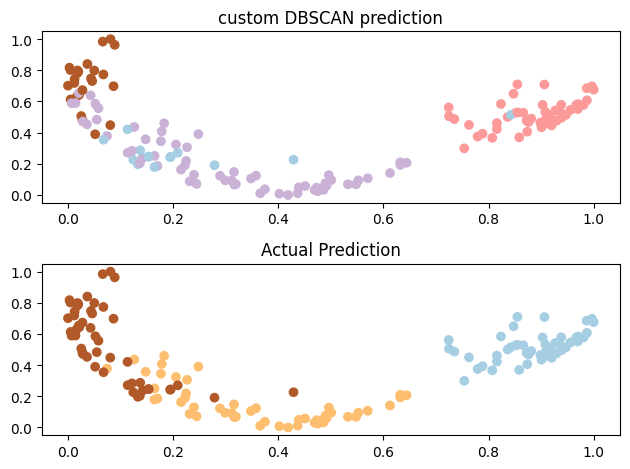

In [ ]:
e = para['e']
k = para['minp']

cluster_array = DBSCANs(normalised_distance, e, k)

print(target_data)
print(cluster_array.astype(int))

plt.subplot(2,1,1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1], c = cluster_array, cmap = 'Paired')
plt.title('custom DBSCAN prediction')


plt.subplot(2,1,2)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c = target_data, cmap = 'Paired')
plt.title('Actual Prediction')

plt.tight_layout()


#Lets try Easier way

In [ ]:
dbscan_array = DBSCAN(eps =  0.3470000000000002, min_samples = 23)

In [ ]:
dbscan_array

DBSCAN(eps=0.3470000000000002, min_samples=23)

In [ ]:
model = dbscan_array.fit(normalised_distance)

In [ ]:
labels =  model.labels_

In [ ]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1])

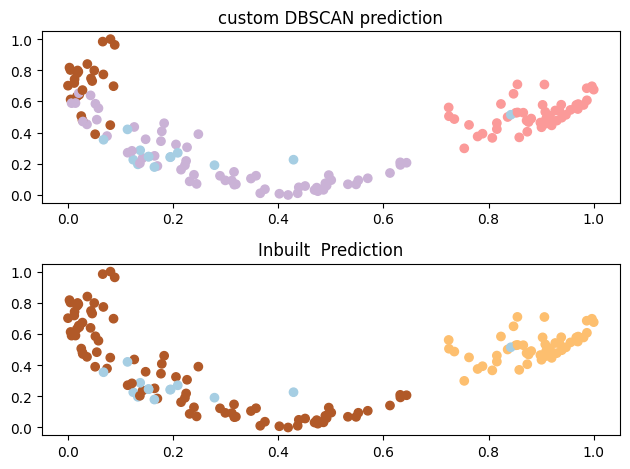

In [ ]:
plt.subplot(2,1,1)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1], c = cluster_array, cmap = 'Paired')
plt.title('custom DBSCAN prediction')


plt.subplot(2,1,2)
plt.scatter(normalised_distance[:,0], normalised_distance[:,1],c = labels, cmap = 'Paired')
plt.title('Inbuilt  Prediction')

plt.tight_layout()
